In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import sqlite3
dat = sqlite3.connect('ds22_guvi_task5_adarsh.db')



In [16]:
df1 = pd.read_csv("takehome_users.csv" ,encoding='ISO-8859-1')
df1.rename(columns = {'object_id':'user_id'}, inplace = True)

#df1.to_sql(name='T1', con=dat)

df2 = pd.read_csv("takehome_user_engagement.csv" ,encoding='ascii' , parse_dates =['time_stamp'])

#df2.to_sql(name='T2', con=dat)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [18]:
#pre =pd.merge(df1,df2,on='inner')
check_val = pd.merge(df1, df2, on='user_id')

# check_val = pd.merge(df1, df2, left_on='object_id' , right_on='user_id')
# left_on , right_on 

In [19]:
check_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     207917 non-null  int64         
 1   creation_time               207917 non-null  object        
 2   name                        207917 non-null  object        
 3   email                       207917 non-null  object        
 4   creation_source             207917 non-null  object        
 5   last_session_creation_time  207917 non-null  float64       
 6   opted_in_to_mailing_list    207917 non-null  int64         
 7   enabled_for_marketing_drip  207917 non-null  int64         
 8   org_id                      207917 non-null  int64         
 9   invited_by_user_id          116887 non-null  float64       
 10  time_stamp                  207917 non-null  datetime64[ns]
 11  visited                     207917 non-

In [20]:
#check_val.to_sql(name='T3', con=dat)

In [21]:
"""
a = []
c = dat.cursor()
c.execute("select count(1) from T1 ") 
for i in c.fetchall():
   a.append(str(i))
c = dat.cursor()
c.execute("CREATE TABLE T4(time_stamp date,user_id integer,visited integer) ")
#c = dat.cursor()
c.execute("insert into T4 select cast(time_stamp as date) time_stamp, user_id , visited from T2")
#c.execute("DROP TABLE T4") 

query = dat.execute("SELECT * From T4")
cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
results
"""

#query = dat.execute(ex1)
#cols = [column[0] for column in query.description]
#results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

'''
t = '2018-09-19'
t = np.datetime64(t)
day = t.astype(datetime.datetime).is
print (day)
'''

"\nt = '2018-09-19'\nt = np.datetime64(t)\nday = t.astype(datetime.datetime).is\nprint (day)\n"

In [41]:
# check_val['dt'] = np.datetime64(check_val ['time_stamp'])
check_val['date'] = check_val['time_stamp'].astype('datetime64')
# check_val['wk'] = check_val['date'].dt.week
check_val['wk'] = check_val['date'].dt.isocalendar().week
check_val['yr'] = check_val['date'].dt.isocalendar().year
check_val['mn'] = check_val['date'].dt.month

In [43]:
check_val.info()
check_val.count()
check_val.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     207917 non-null  int64         
 1   creation_time               207917 non-null  object        
 2   name                        207917 non-null  object        
 3   email                       207917 non-null  object        
 4   creation_source             207917 non-null  object        
 5   last_session_creation_time  207917 non-null  float64       
 6   opted_in_to_mailing_list    207917 non-null  int64         
 7   enabled_for_marketing_drip  207917 non-null  int64         
 8   org_id                      207917 non-null  int64         
 9   invited_by_user_id          116887 non-null  float64       
 10  time_stamp                  207917 non-null  datetime64[ns]
 11  visited                     207917 non-

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,wk,yr,mn
count,207917.000000,2.079170e+05,207917.000000,207917.000000,207917.000000,116887.000000,207917.0,207917.000000,207917.000000,207917.000000
mean,5913.314197,1.399439e+09,0.258137,0.154533,164.315895,5972.167555,1.0,23.908993,2013.382783,5.930112
std,3394.941674,8.294017e+06,0.437611,0.361460,121.165846,3247.095621,0.0,15.302984,0.590900,3.529426
min,1.000000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,1.0,1.000000,2012.000000,1.000000
25%,3087.000000,1.401045e+09,0.000000,0.000000,60.000000,3269.000000,1.0,11.000000,2013.000000,3.000000
50%,5682.000000,1.401665e+09,0.000000,0.000000,145.000000,5972.000000,1.0,20.000000,2013.000000,5.000000
75%,8944.000000,1.401868e+09,1.000000,0.000000,260.000000,8513.000000,1.0,38.000000,2014.000000,9.000000
max,12000.000000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.0,52.000000,2014.000000,12.000000


In [27]:
#c=check_val.groupby(by=['user_id','yr' , 'wk' , 'visited'], as_index=False).count()
# a = check_val.groupby('user_id','yr' , 'wk','visited' )['visited'].count()


In [44]:
count_series = check_val.groupby(['user_id','org_id','yr' ,'mn', 'wk' , 'visited']).size()

In [45]:
new_df = count_series.to_frame(name = 'size').reset_index()
new_df

,user_id,org_id,yr,mn,wk,visited,size
0,1,11,2014,4,17,1,1
1,2,1,2013,11,46,1,1
2,2,1,2013,11,48,1,1
3,2,1,2013,12,50,1,1
4,2,1,2013,12,52,1,1
...,...,...,...,...,...,...,...
75928,11996,89,2013,9,36,1,1
75929,11997,200,2013,1,3,1,1
75930,11998,83,2014,4,17,1,1
75931,11999,6,2012,6,22,1,1


In [46]:
new_df_1 = new_df[new_df['size'] >= 3]

In [47]:
new_df_1.info()
new_df_1.rename(columns = {'size':'cnt'}, inplace = True)
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32754 entries, 6 to 75916
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  32754 non-null  int64
 1   org_id   32754 non-null  int64
 2   yr       32754 non-null  int64
 3   mn       32754 non-null  int64
 4   wk       32754 non-null  int64
 5   visited  32754 non-null  int64
 6   size     32754 non-null  int64
dtypes: int64(7)
memory usage: 2.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32754 entries, 6 to 75916
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  32754 non-null  int64
 1   org_id   32754 non-null  int64
 2   yr       32754 non-null  int64
 3   mn       32754 non-null  int64
 4   wk       32754 non-null  int64
 5   visited  32754 non-null  int64
 6   cnt      32754 non-null  int64
dtypes: int64(7)
memory usage: 2.0 MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
# new_df_1[ (new_df_1['user_id'] == 1027) & (new_df_1['wk'] == 1) & (new_df_1['yr'] == 2013) ]
# check_val[ (check_val['user_id'] == 1027) & (check_val['wk'] == 1) & (check_val['yr'] == 2013) ]

In [35]:
df2.info()
#df2['wk'] = df2['time_stamp'].dt.isocalendar().week
#df2['yr'] = df2['time_stamp'].dt.isocalendar().year
#df2['mn'] = df2['time_stamp'].dt.month
#df2
# df2[ (df2['user_id'] == 1027) & (df2['wk'] <= 1) & (df2['yr'] == 2013) ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [49]:
#print(new_df_1['user_id'].unique())
# new_df_2 = new_df_1.sort_values(by=['user_id', 'org_id' ], inplace=True)
new_df_2 = new_df_1
new_df_2 = new_df_2.groupby(['user_id','org_id']).size()
new_df_2 = new_df_2.to_frame(name = 'size').reset_index()
new_df_2.rename(columns = {'size':'cnt'}, inplace = True)
new_df_2

,user_id,org_id,cnt
0,2,1,1
1,10,318,51
2,20,58,1
3,33,401,1
4,42,235,66
...,...,...,...
1411,11965,65,1
1412,11967,15,7
1413,11969,52,21
1414,11975,31,43


In [50]:
#df2['wk_1'] = df2['time_stamp'].dt.week
#df2[ (df2['user_id'] == 1027) & (df2['wk_1'] <= 1) & (df2['yr'] == 2013) ]

In [51]:
#elan = check_val.groupby(['org_id', 'visited']).size()
#elan

#elan = check_val.groupby(['creation_source', 'visited']).size()
#elan

<Figure size 720x360 with 0 Axes>

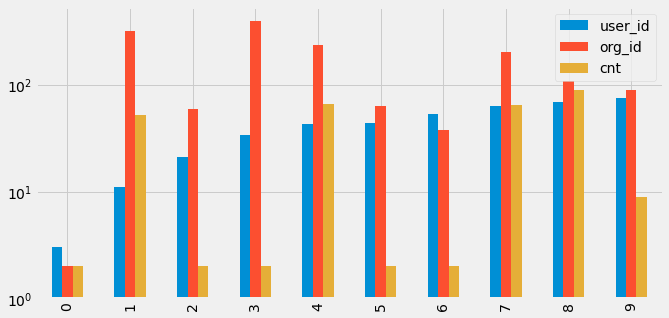

In [52]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
new_df_2.head(10).plot.bar(figsize=(10,5)  , log=True)

In [53]:
user_vs_org_id = new_df_2[["user_id","org_id"]]
user_vs_cnt = new_df_2[["user_id","cnt"]]
org_vs_cnt = new_df_2[["org_id","cnt"]]

<Figure size 720x360 with 0 Axes>

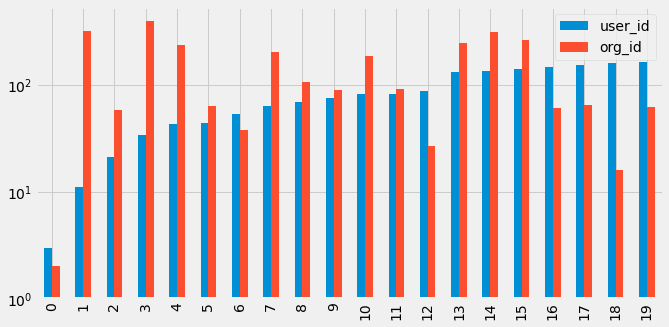

In [54]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
user_vs_org_id.head(20).plot.bar(figsize=(10,5)  , log=True)

<Figure size 720x360 with 0 Axes>

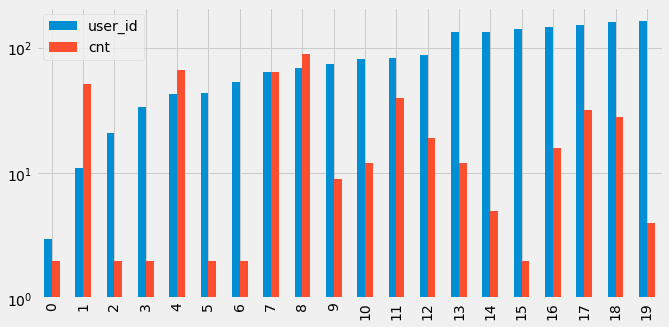

In [55]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
user_vs_cnt.head(20).plot.bar(figsize=(10,5)  , log=True)

<Figure size 720x360 with 0 Axes>

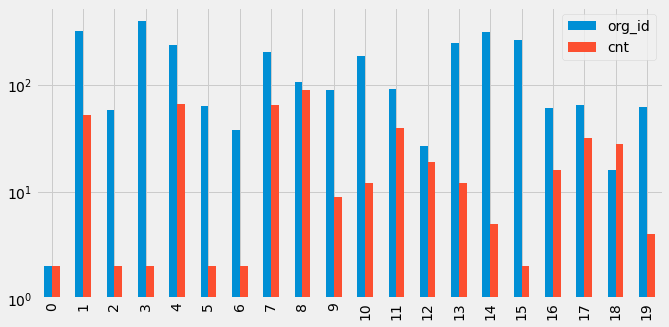

In [56]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
org_vs_cnt.head(20).plot.bar(figsize=(10,5)  , log=True)

In [57]:
creation_source_org_id = check_val[["user_id","org_id","creation_source"]]
creation_source_org_id.info()
#new_df_2
creation_source_vs_user_org_id = pd.merge(creation_source_org_id, new_df_2, on='user_id')
#creation_source_vs_user_org_id.info()
#creation_source_vs_user_org_id.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          207917 non-null  int64 
 1   org_id           207917 non-null  int64 
 2   creation_source  207917 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.3+ MB


In [58]:
cr_src_vs_user_org_id = creation_source_vs_user_org_id[["user_id","org_id_x","creation_source"]]

cr_src_vs_user_org_id_grp = cr_src_vs_user_org_id.groupby(['creation_source']).size()
cr_src_vs_user_org_id_grp = cr_src_vs_user_org_id_grp.to_frame(name = 'size').reset_index()
cr_src_vs_user_org_id_grp.rename(columns = {'size':'cnt'}, inplace = True)

#cr_src_vs_user_org_id_rm_dup = cr_src_vs_user_org_id[cr_src_vs_user_org_id.duplicated(keep='first')]
#cr_src_vs_user_org_id_rm_dup = cr_src_vs_user_org_id_rm_dup.drop_duplicates()
#cr_src_vs_user_org_id_rm_dup.info()
cr_src_vs_user_org_id_grp.info()
cr_src_vs_user_org_id_grp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   creation_source  5 non-null      object
 1   cnt              5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


,creation_source,cnt
0,GUEST_INVITE,44513
1,ORG_INVITE,65654
2,PERSONAL_PROJECTS,18126
3,SIGNUP,35272
4,SIGNUP_GOOGLE_AUTH,32501


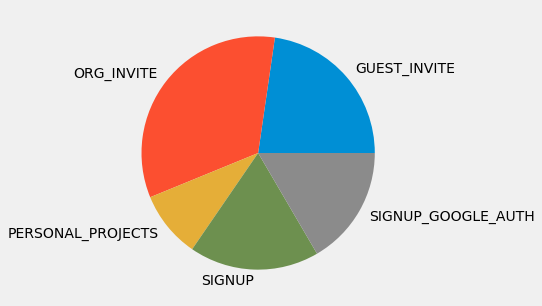

In [59]:
y = np.array(cr_src_vs_user_org_id_grp['cnt'])
mylabels = np.array(cr_src_vs_user_org_id_grp['creation_source'])
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5) )

#new_df_1['user_id'].head(10).plot.bar(figsize=(10,5) , log=True)
# cr_src_vs_user_org_id_grp.head(20).plot.pie(figsize=(10,5)  , log=True)
plt.pie(y,labels =mylabels)
plt.show()